# Описание проекта
Здесь должно находиться Лого проекта, и его описание. Мотивация, средства. Указать ссылки на используемые ресурсы. Так как ипользуется html, то все картинки должны быть расположены на доступных сервисах

Можно указать, что используется вычислительная платформа Анаконда (Картинки logo Anaconda & Jupyter)
<p><img class="logo logo-dark" alt="logo" src="https://www.anaconda.com/wp-content/themes/anaconda/images/logo-dark.png"></p>

In [1]:
#some initial setup
# Importing pandas
import pandas as pd
# This command makes plots appear in the notebook
%matplotlib inline

yiuyiuyiuiuy

# Загрузка данных
Первоначально данные загружаются с ресурса <a href="https://wonder.cdc.gov">CDC WONDER</a> в виде текстовых файлов. Затем эти сырые данные нужно загрузить в память в так называемые фреймы данных <b>pandas</b>:

In [2]:
# Assign filename: file
file = 'datasets/maxTempByMonthYear1999-2011completeCalifornia.txt'

# Import file: data
raw_temp_data = pd.read_csv(file, sep='\t', converters={"Year":int, 'Month Code':int, 'Day of Month':int,'Avg Daily Max Air Temperature (C)':float})

# Print the head of the DataFrame
print(raw_temp_data.head())

   Notes       State  State Code  Year  Year Code Month  Month Code  \
0    NaN  California           6  1999       1999   Jan           1   
1    NaN  California           6  1999       1999   Jan           1   
2    NaN  California           6  1999       1999   Jan           1   
3    NaN  California           6  1999       1999   Jan           1   
4    NaN  California           6  1999       1999   Jan           1   

   Day of Month  Day of Month Code  Avg Daily Max Air Temperature (C)  
0             1                  1                              13.35  
1             2                  2                              14.78  
2             3                  3                              13.77  
3             4                  4                              14.32  
4             5                  5                              14.89  


Теперь нужно избавиться от лишнего, создадим новый фрейм с колонками для дат и максимальной температуры:

In [3]:
raw_temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 10 columns):
Notes                                0 non-null float64
State                                4514 non-null object
State Code                           4514 non-null int64
Year                                 4514 non-null int64
Year Code                            4514 non-null int64
Month                                4514 non-null object
Month Code                           4514 non-null int64
Day of Month                         4514 non-null int64
Day of Month Code                    4514 non-null int64
Avg Daily Max Air Temperature (C)    4514 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 352.7+ KB


In [4]:
california_temp_data = raw_temp_data[['State', 'Year', 'Month Code', 'Day of Month', 'Avg Daily Max Air Temperature (C)']]

In [5]:
california_temp_data.head()

,State,Year,Month Code,Day of Month,Avg Daily Max Air Temperature (C)
0,California,1999,1,1,13.35
1,California,1999,1,2,14.78
2,California,1999,1,3,13.77
3,California,1999,1,4,14.32
4,California,1999,1,5,14.89


In [6]:
california_temp_data.columns = ['state','year', 'month','day','max_temp']

In [7]:
california_temp_data.head()

,state,year,month,day,max_temp
0,California,1999,1,1,13.35
1,California,1999,1,2,14.78
2,California,1999,1,3,13.77
3,California,1999,1,4,14.32
4,California,1999,1,5,14.89


In [8]:
california_summer_temp_data = california_temp_data[(california_temp_data['month']>=5) & (california_temp_data['month']<=9)]

In [9]:
california_summer_temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 113 to 4429
Data columns (total 5 columns):
state       1989 non-null object
year        1989 non-null int64
month       1989 non-null int64
day         1989 non-null int64
max_temp    1989 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 93.2+ KB


In [10]:
california_summer_temp_data.head(10)

,state,year,month,day,max_temp
113,California,1999,5,1,18.79
114,California,1999,5,2,15.01
115,California,1999,5,3,12.95
116,California,1999,5,4,16.11
117,California,1999,5,5,22.11
118,California,1999,5,6,23.43
119,California,1999,5,7,20.93
120,California,1999,5,8,19.19
121,California,1999,5,9,18.02
122,California,1999,5,10,19.22


In [11]:
df_1999 = california_summer_temp_data[california_summer_temp_data['year']==1999]
df_1999.head()
df_1999.describe()
df_1999.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 113 to 265
Data columns (total 5 columns):
state       153 non-null object
year        153 non-null int64
month       153 non-null int64
day         153 non-null int64
max_temp    153 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.2+ KB


In [12]:
#ax = df_1999.plot(x=30*df_1999['month']+df_1999['day'], y = 'max_temp')
#ax = df_1999.plot(x=f_1999['day'], y = 'max_temp')
#_ = ax.set_xlabel("day number, 1999")
#_ = ax.set_ylabel("maximum temperature, (C)")

Теперь попробуем сгруппировать данные по годам и месяцам:

In [13]:
california_summer_temp_data.groupby(['year','month'])['max_temp'].max()

year  month
1999  5        28.14
      6        33.99
      7        34.54
      8        35.07
      9        31.19
2000  5        31.60
      6        34.78
      7        36.10
      8        36.40
      9        33.73
2001  5        33.67
      6        33.70
      7        37.19
      8        36.42
      9        32.78
2002  5        30.93
      6        32.33
      7        37.41
      8        36.70
      9        35.02
2003  5        32.44
      6        34.43
      7        35.98
      8        34.75
      9        34.18
2004  5        29.49
      6        31.25
      7        34.70
      8        36.88
      9        33.90
               ...  
2006  5        29.98
      6        35.68
      7        38.41
      8        33.86
      9        34.23
2007  5        28.46
      6        32.60
      7        38.09
      8        36.12
      9        34.79
2008  5        32.27
      6        34.08
      7        37.14
      8        35.91
      9        35.37
2009  5        32.85
 

# Данные о смертности от инсультов

Мы получили ежемесячные данные о смертности от сосудистых заболеваний по всем штатам США за период с 1999 по 2011 годы.
Нужно выделить данные о смертности от инсультов:

In [14]:
# Assign filename: file
file = 'datasets/causeOfDeathAllStates01_56_I00-I78_1999-2011.txt'

# Import file: data
#raw_temp_data = pd.read_csv(file, sep='\t', converters={"Year":int, 'Month Code':int, 'Day of Month':int,'Avg Daily Max Air Temperature (C)':float})
raw_death_data = pd.read_csv(file, sep='\t')
# Print the head of the DataFrame
print(raw_death_data.head())


   Notes    State  State Code  Year  Year Code       Month Month Code  \
0    NaN  Alabama           1  1999       1999  Jan., 1999    1999/01   
1    NaN  Alabama           1  1999       1999  Jan., 1999    1999/01   
2    NaN  Alabama           1  1999       1999  Jan., 1999    1999/01   
3    NaN  Alabama           1  1999       1999  Jan., 1999    1999/01   
4    NaN  Alabama           1  1999       1999  Feb., 1999    1999/02   

                                      Cause of death Cause of death Code  \
0              Subarachnoid haemorrhage, unspecified               I60.9   
1             Intracerebral haemorrhage, unspecified               I61.9   
2                   Cerebral infarction, unspecified               I63.9   
3  Stroke, not specified as haemorrhage or infarc...                 I64   
4             Intracerebral haemorrhage, unspecified               I61.9   

   Deaths      Population      Crude Rate  
0      12  Not Applicable  Not Applicable  
1      29  Not A

In [15]:
death_data = raw_death_data[['State', 'Year', 'Month Code', 'Cause of death Code', 'Deaths']]

In [16]:
stroke_death_data = death_data[death_data['Cause of death Code']=='I64']

In [17]:
stroke_death_data.head()

,State,Year,Month Code,Cause of death Code,Deaths
3,Alabama,1999,1999/01,I64,107
5,Alabama,1999,1999/02,I64,98
8,Alabama,1999,1999/03,I64,114
10,Alabama,1999,1999/04,I64,91
12,Alabama,1999,1999/05,I64,89


In [18]:
stroke_death_data.tail()

,State,Year,Month Code,Cause of death Code,Deaths
22261,Wyoming,2004,2004/07,I64,10
22262,Wyoming,2005,2005/02,I64,10
22263,Wyoming,2005,2005/07,I64,11
22264,Wyoming,2006,2006/09,I64,11
22265,Wyoming,2007,2007/10,I64,10


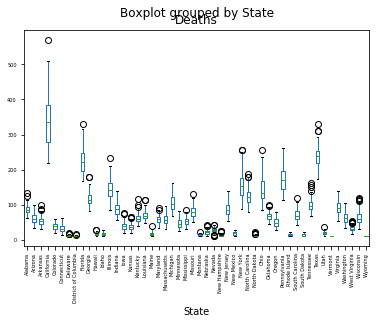

In [19]:
stroke_death_data.boxplot(by='State', 
                       column=['Deaths'], 
                       grid=False, rot=90, fontsize=5)

Мы должны учесть что штаты заселены очень неравномерно и для корректности сравнения смертности по штатам необходимо масштабирование

In [20]:
states_population_file = 'datasets/us-population-by-state-and-count.csv'
states_population_raw = pd.read_csv(states_population_file)
# Print the head of the DataFrame
print(states_population_raw.head())

                                  Year    Alabama    Alaska    Arizona  \
0                                 2012  4777326.0  711139.0  6410979.0   
1  US population (by state and county)        NaN       NaN        NaN   

    Arkansas  California   Colorado  Connecticut  Delaware  \
0  2916372.0  37325068.0  5042853.0    3572213.0  900131.0   
1        NaN         NaN        NaN          NaN       NaN   

   District of Columbia    ...     South Dakota  Tennessee       Texas  \
0              605759.0    ...         815871.0  6353226.0  25208897.0   
1                   NaN    ...              NaN        NaN         NaN   

        Utah   Vermont   Virginia  Washington  West Virginia  Wisconsin  \
0  2766233.0  625498.0  8014955.0   6738714.0      1850481.0  5687219.0   
1        NaN       NaN        NaN         NaN            NaN        NaN   

    Wyoming  
0  562803.0  
1       NaN  

[2 rows x 53 columns]


In [21]:
states_population = states_population_raw.T

In [22]:
states_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, Year to Wyoming
Data columns (total 2 columns):
0    53 non-null object
1    1 non-null object
dtypes: object(2)
memory usage: 3.7+ KB


In [23]:
states_population.head()

,0,1
Year,2012,US population (by state and county)
Alabama,4.77733e+06,NaN
Alaska,711139,NaN
Arizona,6.41098e+06,NaN
Arkansas,2.91637e+06,NaN


In [24]:
sp = states_population[2:]

In [25]:
sp.head()

,0,1
Alaska,711139,NaN
Arizona,6.41098e+06,NaN
Arkansas,2.91637e+06,NaN
California,3.73251e+07,NaN
Colorado,5.04285e+06,NaN


In [26]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alaska to Wyoming
Data columns (total 2 columns):
0    51 non-null object
1    0 non-null object
dtypes: object(2)
memory usage: 1.2+ KB


In [27]:
sp.reset_index(level=0, inplace=True)
sp1 = sp.iloc[:,0:2]

In [28]:
sp1.head()

,index,0
0,Alaska,711139
1,Arizona,6.41098e+06
2,Arkansas,2.91637e+06
3,California,3.73251e+07
4,Colorado,5.04285e+06


In [29]:
sp1.columns = ['State','PopulationStr']

In [30]:
sp1.head()

,State,PopulationStr
0,Alaska,711139
1,Arizona,6.41098e+06
2,Arkansas,2.91637e+06
3,California,3.73251e+07
4,Colorado,5.04285e+06


In [31]:
sp1[['PopulationStr']] = sp1[['PopulationStr']].apply(pd.to_numeric)

In [32]:
sp1.head(51)

,State,PopulationStr
0,Alaska,711139.0
1,Arizona,6410979.0
2,Arkansas,2916372.0
3,California,37325068.0
4,Colorado,5042853.0
5,Connecticut,3572213.0
6,Delaware,900131.0
7,District of Columbia,605759.0
8,Florida,18885152.0
9,Georgia,9714569.0


In [33]:
sp1.to_csv('datasets/population_by_state.csv')

In [34]:
stroke_death_data.State.unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [35]:
len(stroke_death_data.State.unique())

50

# Присоединение численности населения 

Сейчас нужно к данным о смертности присоединить данные о численности населения в соответствующем штате

In [36]:
stroke_death_with_pop = pd.merge(stroke_death_data, sp1, on='State')

In [37]:
stroke_death_with_pop.head(20)

,State,Year,Month Code,Cause of death Code,Deaths,PopulationStr
0,Arizona,1999,1999/01,I64,100,6410979.0
1,Arizona,1999,1999/02,I64,83,6410979.0
2,Arizona,1999,1999/03,I64,81,6410979.0
3,Arizona,1999,1999/04,I64,76,6410979.0
4,Arizona,1999,1999/05,I64,68,6410979.0
5,Arizona,1999,1999/06,I64,61,6410979.0
6,Arizona,1999,1999/07,I64,67,6410979.0
7,Arizona,1999,1999/08,I64,68,6410979.0
8,Arizona,1999,1999/09,I64,58,6410979.0
9,Arizona,1999,1999/10,I64,69,6410979.0


Добавим колонку с номером месяца

In [38]:
s = '2000/05'
ss = s[-2:]
print(ss)

05


In [39]:
month_suffix = lambda s: s[-2:]
s = '2000/05'
print(month_suffix(s))

05


In [40]:
stroke_death_with_pop['Month'] = stroke_death_with_pop['Month Code'].apply(month_suffix).apply(pd.to_numeric)
stroke_death_with_pop['DeathPerMillion'] = stroke_death_with_pop['Deaths']/stroke_death_with_pop['PopulationStr']*1000000

In [41]:
stroke_death_with_pop.head()

,State,Year,Month Code,Cause of death Code,Deaths,PopulationStr,Month,DeathPerMillion
0,Arizona,1999,1999/01,I64,100,6410979.0,1,15.598242
1,Arizona,1999,1999/02,I64,83,6410979.0,2,12.946541
2,Arizona,1999,1999/03,I64,81,6410979.0,3,12.634576
3,Arizona,1999,1999/04,I64,76,6410979.0,4,11.854664
4,Arizona,1999,1999/05,I64,68,6410979.0,5,10.606804


# Смертность в крупнейших штатах

<p><img src="https://www.cdc.gov/stroke/images/stroke-map.jpg"></p>

Выберем данные соответствующие 10 крупнейшим штатам 

In [42]:
most_populated_states = sp1.sort_values(by=['PopulationStr'], ascending=[False])

In [43]:
most_populated_states.head()

,State,PopulationStr
3,California,37325068.0
43,Texas,25208897.0
31,New York,19398125.0
8,Florida,18885152.0
12,Illinois,12823860.0


In [44]:
states_names_01_10 = most_populated_states.iloc[:10]['State'].tolist()
print(states_names_01_10)

['California', 'Texas', 'New York', 'Florida', 'Illinois', 'Pennsylvania', 'Ohio', 'Michigan', 'Georgia', 'North Carolina']


In [45]:
stroke_death_most_populted_01_10 = stroke_death_with_pop[stroke_death_with_pop['State'].isin(states_names_01_10)]

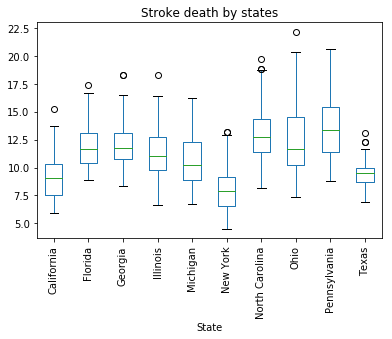

In [46]:
import matplotlib.pyplot as plt
stroke_death_most_populted_01_10.boxplot(by='State', 
                       column=['DeathPerMillion'], 
                       grid=False, rot=90)
plt.title("Stroke death by states")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

plt.show()

Следующие 10 штатов

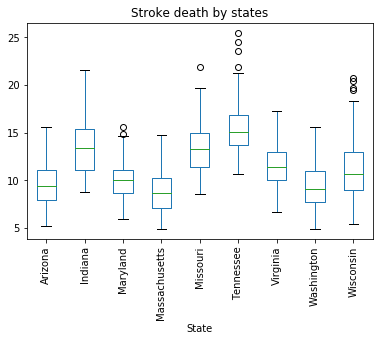

In [47]:
states_names_11_20 = most_populated_states.iloc[11:20]['State'].tolist()
stroke_death_most_populted_11_20 = stroke_death_with_pop[stroke_death_with_pop['State'].isin(states_names_11_20)]
stroke_death_most_populted_11_20.boxplot(by='State', 
                       column=['DeathPerMillion'], 
                       grid=False, rot=90)
plt.title("Stroke death by states")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

plt.show()

# Карта США

<p><img src="https://upload.wikimedia.org/wikipedia/commons/1/1e/Map_of_USA_showing_state_names.png"></p>

In [141]:
#вырезаем калифорнию
california = stroke_death_with_pop[stroke_death_with_pop["State"]=="California"]
print(california_summer_temp_data_month)
california

           state  Year  Month  day  max_temp
113   California  1999      5    1     18.79
144   California  1999      6    1     21.90
174   California  1999      7    1     32.93
205   California  1999      8    1     29.49
236   California  1999      9    1     24.79
459   California  2000      5    1     24.99
490   California  2000      6    1     27.80
520   California  2000      7    1     28.81
551   California  2000      8    1     36.40
582   California  2000      9    1     19.31
807   California  2001      5    1     23.44
838   California  2001      6    1     29.95
868   California  2001      7    1     34.08
899   California  2001      8    1     31.07
930   California  2001      9    1     30.76
1153  California  2002      5    1     16.13
1184  California  2002      6    1     25.52
1214  California  2002      7    1     33.30
1245  California  2002      8    1     33.04
1276  California  2002      9    1     34.93
1501  California  2003      5    1     17.67
1532  Cali

,State,Year,Month Code,Cause of death Code,Deaths,PopulationStr,Month,DeathPerMillion
312,California,1999,1999/01,I64,440,37325068.0,1,11.788324
313,California,1999,1999/02,I64,439,37325068.0,2,11.761532
314,California,1999,1999/03,I64,414,37325068.0,3,11.091741
315,California,1999,1999/04,I64,403,37325068.0,4,10.797033
316,California,1999,1999/05,I64,368,37325068.0,5,9.859326
317,California,1999,1999/06,I64,392,37325068.0,6,10.502325
318,California,1999,1999/07,I64,360,37325068.0,7,9.644992
319,California,1999,1999/08,I64,377,37325068.0,8,10.100450
320,California,1999,1999/09,I64,356,37325068.0,9,9.537826
321,California,1999,1999/10,I64,350,37325068.0,10,9.377076


In [142]:
#смерти + температура
all_in = pd.merge(california, california_summer_temp_data_month, on=['Year','Month'])
all_in

,State,Year,Month Code,Cause of death Code,Deaths,PopulationStr,Month,DeathPerMillion,state,day,max_temp
0,California,1999,1999/05,I64,368,37325068.0,5,9.859326,California,1,18.79
1,California,1999,1999/06,I64,392,37325068.0,6,10.502325,California,1,21.90
2,California,1999,1999/07,I64,360,37325068.0,7,9.644992,California,1,32.93
3,California,1999,1999/08,I64,377,37325068.0,8,10.100450,California,1,29.49
4,California,1999,1999/09,I64,356,37325068.0,9,9.537826,California,1,24.79
5,California,2000,2000/05,I64,397,37325068.0,5,10.636283,California,1,24.99
6,California,2000,2000/06,I64,385,37325068.0,6,10.314784,California,1,27.80
7,California,2000,2000/07,I64,409,37325068.0,7,10.957783,California,1,28.81
8,California,2000,2000/08,I64,376,37325068.0,8,10.073659,California,1,36.40
9,California,2000,2000/09,I64,387,37325068.0,9,10.368367,California,1,19.31


In [137]:
california_people_summer = california[(california["Month"]>=5) & (california["Month"]<=9)]
california_people_summer

,State,Year,Month Code,Cause of death Code,Deaths,PopulationStr,Month,DeathPerMillion
316,California,1999,1999/05,I64,368,37325068.0,5,9.859326
317,California,1999,1999/06,I64,392,37325068.0,6,10.502325
318,California,1999,1999/07,I64,360,37325068.0,7,9.644992
319,California,1999,1999/08,I64,377,37325068.0,8,10.100450
320,California,1999,1999/09,I64,356,37325068.0,9,9.537826
328,California,2000,2000/05,I64,397,37325068.0,5,10.636283
329,California,2000,2000/06,I64,385,37325068.0,6,10.314784
330,California,2000,2000/07,I64,409,37325068.0,7,10.957783
331,California,2000,2000/08,I64,376,37325068.0,8,10.073659
332,California,2000,2000/09,I64,387,37325068.0,9,10.368367


In [119]:
#вычисл средние значения темп и смерти 
california_summer_temp_average = california_summer_temp_data_month.groupby(['Month'])['max_temp'].mean()
california_summer_death_average = california_people_summer.groupby(['Month'])['DeathPerMillion'].mean()
california_summer_temp_data_month = california_summer_temp_data[california_summer_temp_data["day"]==1]
california_summer_temp_data_month.columns = ['state','Year','Month','day','max_temp']
print(california_summer_death_average)
print(california_summer_temp_data_month)
california_summer_temp_average

Month
5    8.956653
6    8.527987
7    8.342506
8    8.488830
9    8.262131
Name: DeathPerMillion, dtype: float64
           state  Year  Month  day  max_temp
113   California  1999      5    1     18.79
144   California  1999      6    1     21.90
174   California  1999      7    1     32.93
205   California  1999      8    1     29.49
236   California  1999      9    1     24.79
459   California  2000      5    1     24.99
490   California  2000      6    1     27.80
520   California  2000      7    1     28.81
551   California  2000      8    1     36.40
582   California  2000      9    1     19.31
807   California  2001      5    1     23.44
838   California  2001      6    1     29.95
868   California  2001      7    1     34.08
899   California  2001      8    1     31.07
930   California  2001      9    1     30.76
1153  California  2002      5    1     16.13
1184  California  2002      6    1     25.52
1214  California  2002      7    1     33.30
1245  California  2002      8  

Month
5    20.344615
6    25.917692
7    31.393846
8    31.673077
9    30.601538
Name: max_temp, dtype: float64

In [129]:
mapp = {'Month':[5,6,7,8,9],'AverageTemp':[20.344615, 25.917692, 31.393846,31.673077, 30.601538]}
mapp2 = {'Month':[5,6,7,8,9],'AverageDeath':[8.956653, 8.527987, 8.342506, 8.488830, 8.262131]}
mapp

{'Month': [5, 6, 7, 8, 9],
 'AverageTemp': [20.344615, 25.917692, 31.393846, 31.673077, 30.601538]}

In [130]:
average_summer_month = pd.DataFrame(data=mapp)
california_summer_death = pd.DataFrame(data=mapp2)
average_summer_month


,Month,AverageTemp
0,5,20.344615
1,6,25.917692
2,7,31.393846
3,8,31.673077
4,9,30.601538


In [131]:
# средняя темпа + ежемес темпа
california_summer_temp_deviation = pd.merge(average_summer_month, california_summer_temp_data_month, on=['Month'])
california_summer_temp_deviation = pd.merge(california_summer_temp_deviation, california_summer_death, on=['Month'])
type(california_summer_temp_deviation)

pandas.core.frame.DataFrame

In [144]:
california_summer_temp_deviation


,Month,AverageTemp,state,Year,day,max_temp,AverageDeath,Temp_increase_koef,Death_increase_koef
0,5,20.344615,California,1999,1,18.79,8.956653,-1.554615,1.100782
1,5,20.344615,California,2000,1,24.99,8.956653,4.645385,1.172573
2,5,20.344615,California,2001,1,23.44,8.956653,3.095385,1.076852
3,5,20.344615,California,2002,1,16.13,8.956653,-4.214615,1.127704
4,5,20.344615,California,2003,1,17.67,8.956653,-2.674615,1.064887
5,5,20.344615,California,2004,1,26.04,8.956653,5.695385,1.187529
6,5,20.344615,California,2005,1,18.73,8.956653,-1.614615,1.151634
7,5,20.344615,California,2006,1,24.75,8.956653,4.405385,1.223424
8,5,20.344615,California,2007,1,21.68,8.956653,1.335385,1.124712
9,5,20.344615,California,2008,1,17.34,8.956653,-3.004615,1.157616


In [149]:
california_summer_temp_deviation['Temp_increase_koef'] = (california_summer_temp_deviation['max_temp']-california_summer_temp_deviation['AverageTemp'])
california_summer_temp_deviation['Death_increase_koef'] = (all_in['DeathPerMillion']/california_summer_temp_deviation['AverageDeath'])
california_summer_temp_deviation

,Month,AverageTemp,state,Year,day,max_temp,AverageDeath,Temp_increase_koef,Death_increase_koef
0,5,20.344615,California,1999,1,18.79,8.956653,-1.554615,1.100782
1,5,20.344615,California,2000,1,24.99,8.956653,4.645385,1.172573
2,5,20.344615,California,2001,1,23.44,8.956653,3.095385,1.076852
3,5,20.344615,California,2002,1,16.13,8.956653,-4.214615,1.127704
4,5,20.344615,California,2003,1,17.67,8.956653,-2.674615,1.064887
5,5,20.344615,California,2004,1,26.04,8.956653,5.695385,1.187529
6,5,20.344615,California,2005,1,18.73,8.956653,-1.614615,1.151634
7,5,20.344615,California,2006,1,24.75,8.956653,4.405385,1.223424
8,5,20.344615,California,2007,1,21.68,8.956653,1.335385,1.124712
9,5,20.344615,California,2008,1,17.34,8.956653,-3.004615,1.157616


In [ ]:
#
#average_temp_california = 
#average_temp_perMonth = 

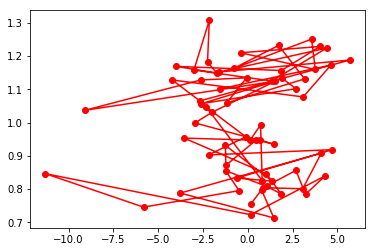

In [145]:
plt.plot(california_summer_temp_deviation['Temp_increase_koef'], california_summer_temp_deviation['Death_increase_koef'], 'ro-')
#plt.title("Stroke death by states")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
#plt.suptitle("")

#plt.show()